In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:

# Load the datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')


In [3]:

# Basic EDA for Customers
print("Customers Dataset Info:")
print(customers_df.info())
print("\nCustomers by Region:")
print(customers_df['Region'].value_counts())


Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Customers by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [4]:

# Basic EDA for Products
print("\nProducts Dataset Info:")
print(products_df.info())
print("\nProducts by Category:")
print(products_df['Category'].value_counts())



Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Products by Category:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


In [5]:

# Basic EDA for Transactions
print("\nTransactions Dataset Info:")
print(transactions_df.info())



Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [12]:
# Basic Statistics
print("\nCustomers Description:")
print(customers_df.describe(include='all'))
print("\nProducts Description:")
print(products_df.describe(include='all'))
print("\nTransactions Description:")
print(transactions_df.describe())


Customers Description:
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00

Products Description:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66

In [6]:

# Convert dates to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])


In [7]:

# Calculate key metrics
total_revenue = transactions_df['TotalValue'].sum()
avg_transaction_value = transactions_df['TotalValue'].mean()
customers_count = customers_df['CustomerID'].nunique()
products_count = products_df['ProductID'].nunique()


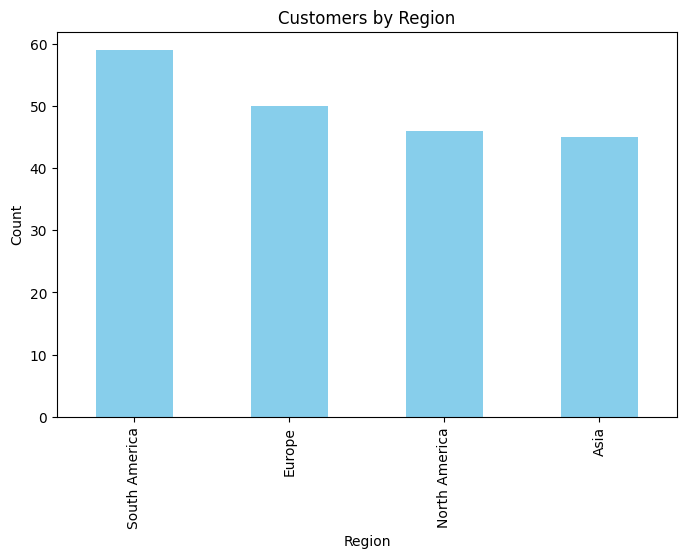

In [14]:
# Analyze Customers by Region
region_counts = customers_df['Region'].value_counts()
plt.figure(figsize=(8, 5))
region_counts.plot(kind='bar', color='skyblue', title="Customers by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

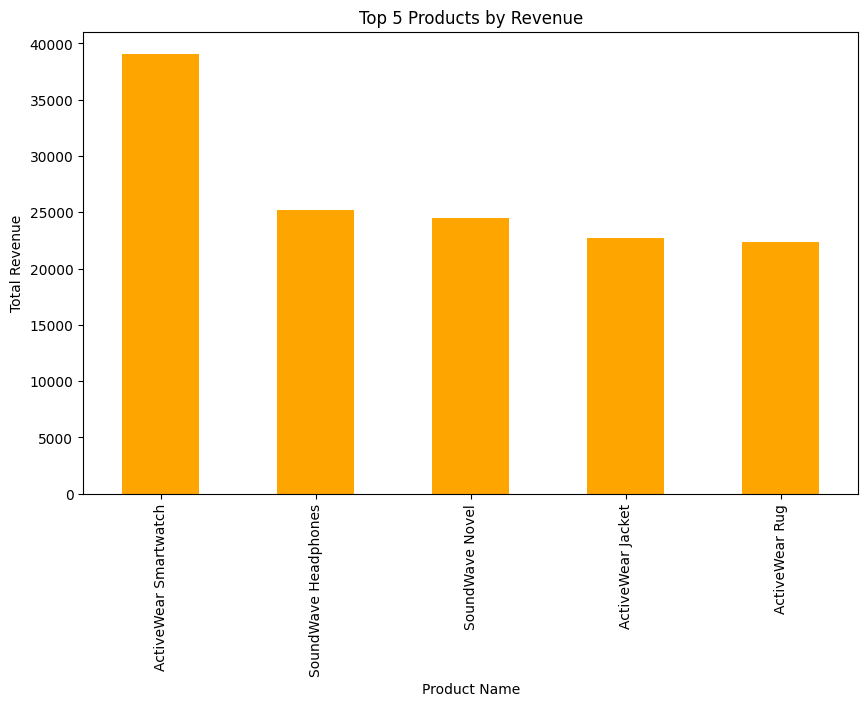

In [16]:
# Analyze Top Products by Revenue
merged_data = pd.merge(transactions_df, products_df, on='ProductID')
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='orange', title="Top 5 Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Total Revenue")
plt.show()

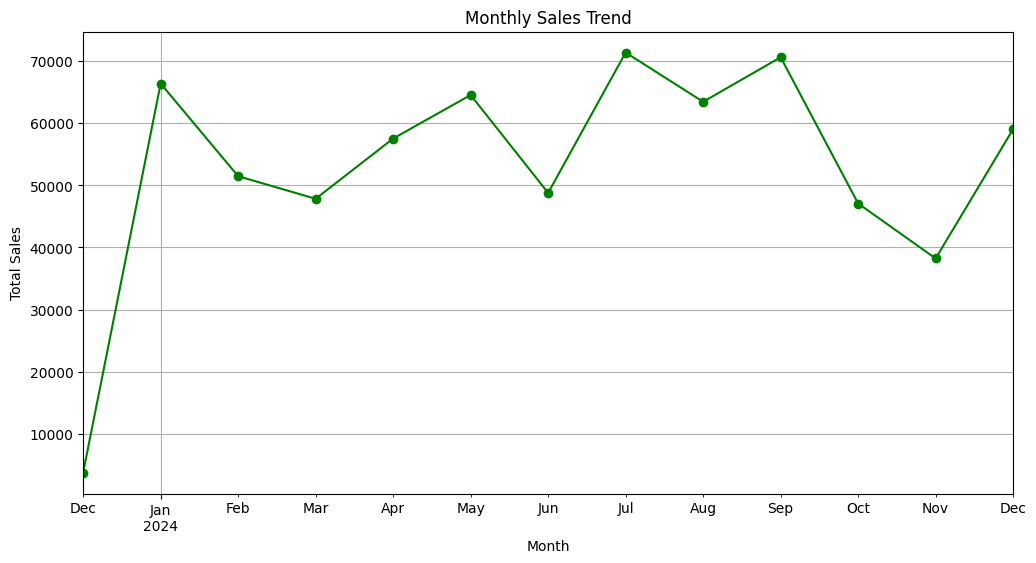

In [17]:
# Analyze Transactions over Time
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', title="Monthly Sales Trend", color='green')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

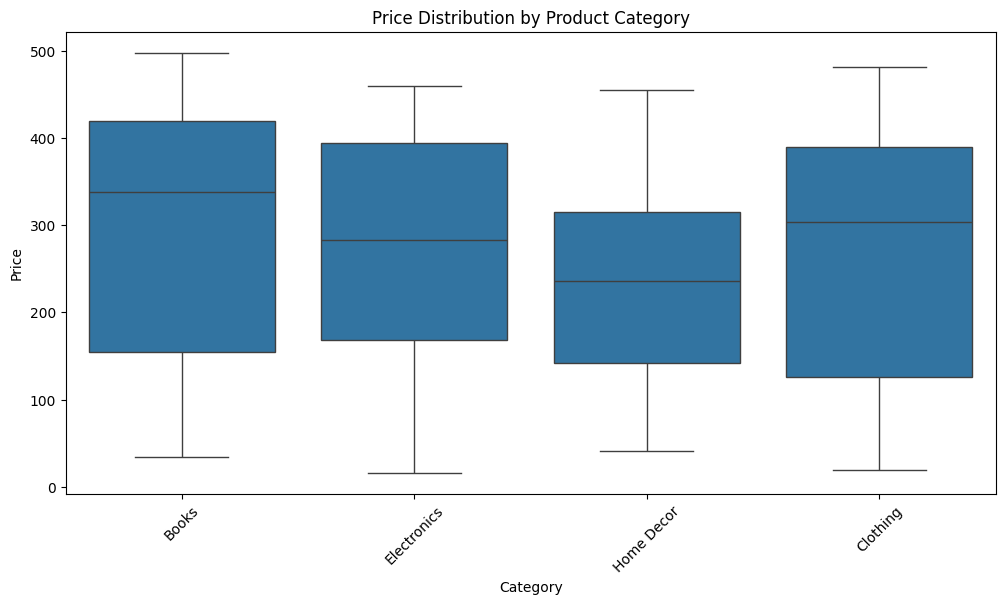

In [8]:

# Visualizations
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=products_df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Product Category')
plt.show()


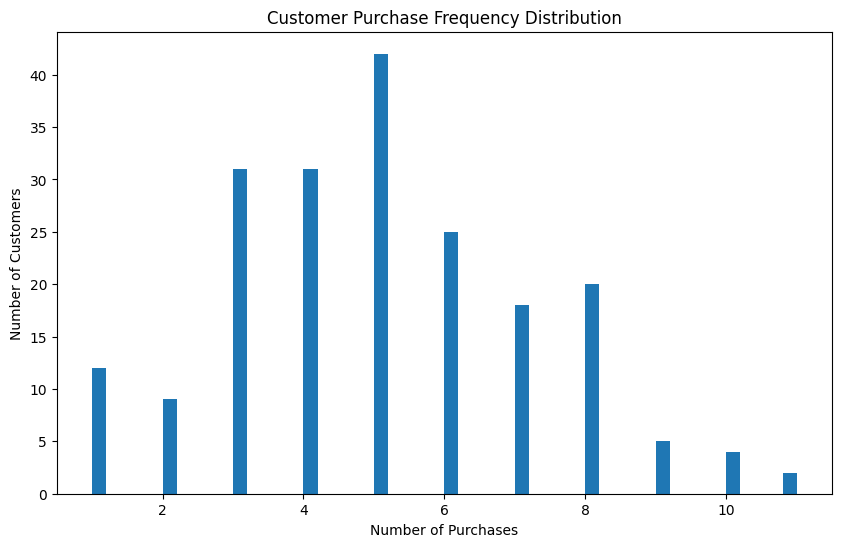

In [9]:

# Customer purchase frequency
customer_frequency = transactions_df['CustomerID'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(customer_frequency, bins=50)
plt.title('Customer Purchase Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
merged_data.to_csv("merged_data.csv", index=False)